# Maîtrise de Matplotlib
On commence par importer les librairies à utiliser

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


Matplotlib représente graphiquement les données sur `.Figure`\s , chacune pouvant contenir :
- un ou plusieurs `~.axes.Axes`,
- une zone où les points peuvent être spécifiés en termes de:
    - coordonnées x-y (2D)
    - ou θ en radian dans un tracé polaire
    - x-y-z dans un tracé 3D, etc

## Créer une figure Matplotlib

[]

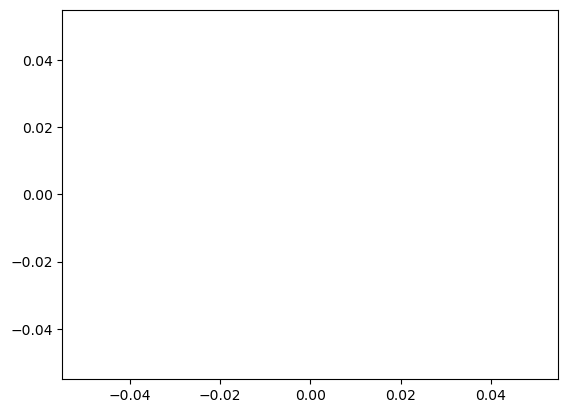

In [2]:
plt.plot()

## Tracer à l'aide de `plot`

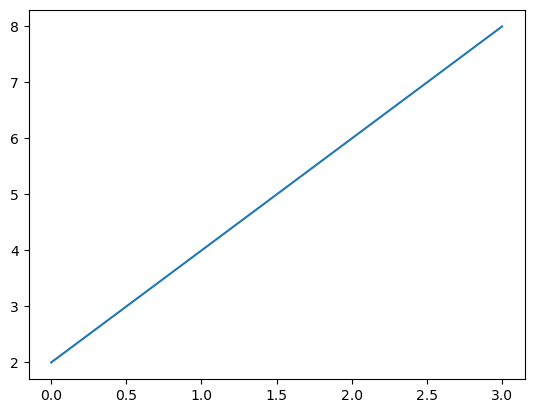

In [3]:
plt.plot([2,4,6,8])

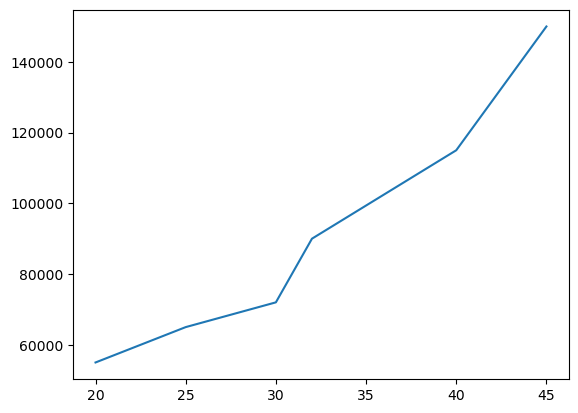

In [4]:
salaries=[55000,65000,72000,90000,115000,150000]
ages = [20,25,30,32,40,45]
plt.plot(ages, salaries)

## Tracer à l'aide de `subplots`

Le moyen le plus simple de créer une figure avec des axes consiste à utiliser `.pyplot.subplots`. Nous pouvons ensuite utiliser `.Axes.plot` pour dessiner des données sur les Axes :


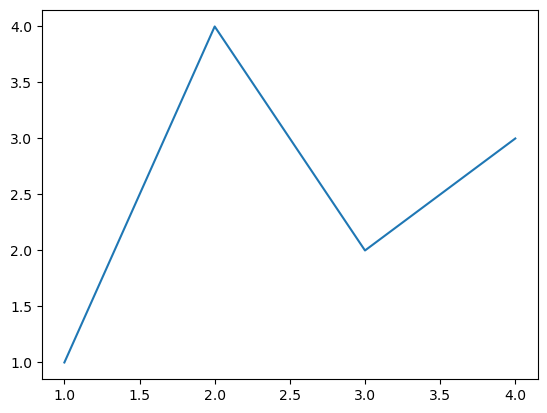

In [5]:
fig, ax = plt.subplots()  # Créez une figure contenant un seul axe.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Tracez des données sur les axes.

# Types d'entrées pour les fonctions de traçage

Les fonctions de traçage attendent :
- `numpy.array` en tant qu'entrée, 
- ou des objets qui peuvent être définis dans `numpy.asarray`.

Les classes qui sont similaires aux tableaux ('array-like') 
comme les objets de données `pandas` et les objets de données `numpy.matrix` peuvent ne pas fonctionner comme prévu. 

Une convention commune est de les convertir en objets `numpy.array` avant d'effectuer le tracé.
Par exemple, pour convertir une `numpy.matrix`

In [6]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

La plupart des méthodes analyseront également un objet adressable comme un *__dict__*, ou un `pandas.DataFrame`. 

Text(0, 0.5, 'entry b')

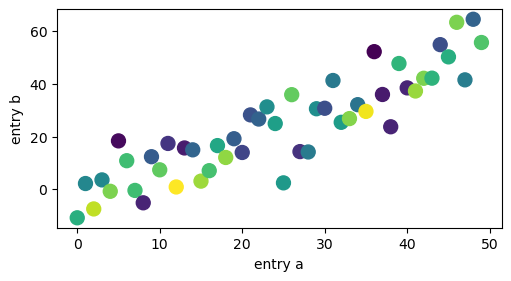

In [7]:
np.random.seed(19680801)  # Fixer le générateur de nombres aléatoires.
donnée = {'a': np.arange(50),
        'c': np.random.randint(0, 250, 50),
        'd': np.random.randn(50)}
donnée['b'] = donnée['a'] + 10 * np.random.randn(50)
donnée['d'] = np.abs(donnée['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

ax.scatter('a', 'b',c ='c', s=100, data=donnée)
# s : Définit la taille du marqueur en points**2 (par inches)
# c : définit les couleurs 
#(les couleurs ici suivent un colormapping par défaut cmap= 'viridis')

ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

**Note** :  `constrained_layout` ajuste automatiquement les sous-parcelles et les décorations comme les légendes et les barres de couleurs afin qu'elles tiennent dans la fenêtre de la figure tout en préservant, du mieux qu'elles peuvent, la disposition logique demandée par l'utilisateur.

`constrained_layout` est similaire à ` tight_layout`, mais utilise un solveur de contraintes pour déterminer la taille des axes qui leur permet de s'adapter.

## Les styles de codage

### Les interfaces explicites et implicites

Il existe essentiellement deux façons d'utiliser Matplotlib :

- Créer des figures et des axes de manière explicite et appeler des méthodes sur ceux-ci (le "style orienté objet (OO)").
- S'appuyer sur pyplot pour créer et gérer les figures et les axes de manière implicite, et tracer à l'aide des fonctions pyplot.



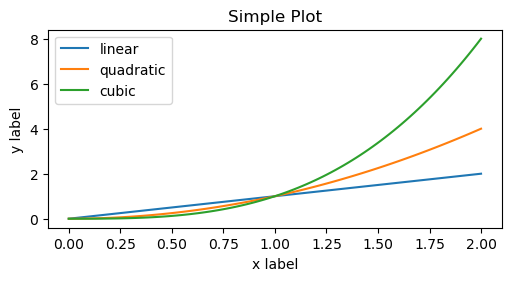

In [8]:
# le style orienté objet des axes et figures
x = np.linspace(0, 2, 100)  
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear') 
ax.plot(x, x**2, label='quadratic')  
ax.plot(x, x**3, label='cubic')  
ax.set_xlabel('x label')  
ax.set_ylabel('y label')  
ax.set_title("Simple Plot")  
ax.legend();

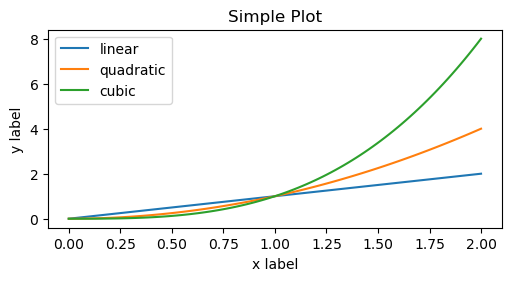

In [9]:
# le style pyplot :
x = np.linspace(0, 2, 100) 
plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear') 
plt.plot(x, x**2, label='quadratic') 
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

# Création d'une fonction d'assistance
Si vous devez créer les mêmes tracés encore et encore avec différents ensembles de données, ou si vous souhaitez envelopper facilement les méthodes Matplotlib, utilisez la fonction de signature recommandée ci-dessous.

In [10]:
def my_plotter(ax, data1, data2, param_dict):
    """
   Une fonction d'assistance pour faire un graphique.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

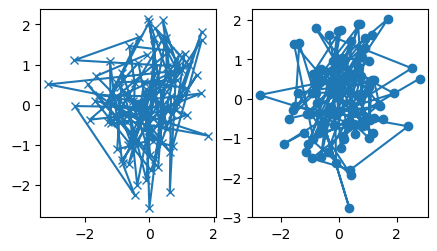

In [11]:
data1, data2, data3, data4 = np.random.randn(4, 100) 
# créer 4 ensembles de données aléatoires
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

## Définition des options de style

La plupart des méthodes de traçage ont des options de style accessibles soit
lorsqu'une méthode de traçage est appelée, ou à partir d'un "setter". 

### Style de ligne
Dans le tracé ci-dessous, nous définissons manuellement la * couleur *, * la largeur de ligne * et le * style de ligne * créés par `~.Axes.plot`, et nous définissons le style de ligne de la deuxième ligne
après coup avec `.set_linestyle`.

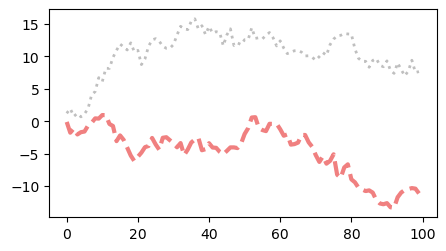

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='lightcoral', 
        linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='k' , alpha = 0.25
           , linewidth=2)
l.set_linestyle(':');

### Couleurs

Matplotlib a une gamme de couleurs très flexible. Certains tracés utilisent plusieurs couleurs.

##### Exemple :
Pour un plot de type `~.Axes.scatter`, le bord des marqueurs peut être de couleurs différentes
de l'intérieur :



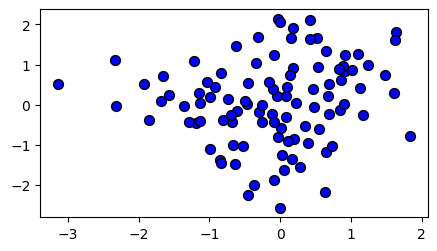

In [13]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='b', edgecolor='k');

### Largeurs de ligne, styles de ligne et tailles de marqueurs

Les largeurs de ligne sont généralement exprimées en points typographiques (1 pt = 1/72 pouce).
De même, les lignes tracées
peut avoir un style de ligne.
La taille du marqueur dépend de la méthode utilisée.
  `~.Axes.plot` spécifie la taille du marqueur en points et correspond généralement au "diamètre" ou à la largeur du
marqueur. `~.Axes.scatter` spécifie une taille de marqueur approximative
proportionnelle à la zone visuelle du marqueur.

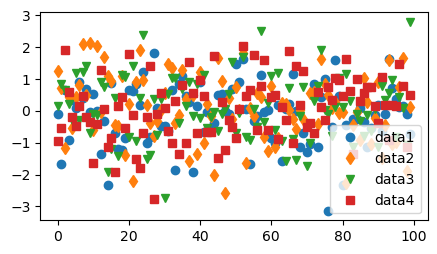

In [14]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

## Étiquetage des plots

### Libellés et texte des axes

`~.Axes.set_xlabel`, `~.Axes.set_ylabel` et `~.Axes.set_title` sont utilisés pour
ajouter du texte aux emplacements indiqués.

Le texte peut également être directement ajouté aux tracés à l'aide de
`~.Axes.text` :


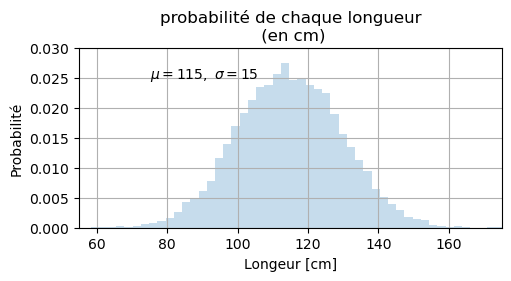

In [15]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# créer un histogramme
n, bins, patches = ax.hist(x, 50, density= True, 
                           facecolor='C0', alpha=0.25)

ax.set_xlabel('Longeur [cm]')
ax.set_ylabel('Probabilité')
ax.set_title('probabilité de chaque longueur\n (en cm)')
ax.text(75, 0.025, '$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

### Annotations

On peut aussi annoter des points sur un tracé, souvent en reliant une flèche pointant
à *xy*, à un morceau de texte à *xytext* :


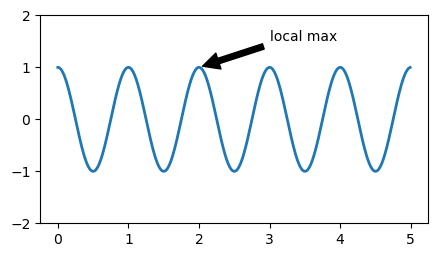

In [16]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s,lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), 
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

### Légendes

Souvent, nous voulons identifier des lignes ou des marqueurs avec un `.Axes.legend` :


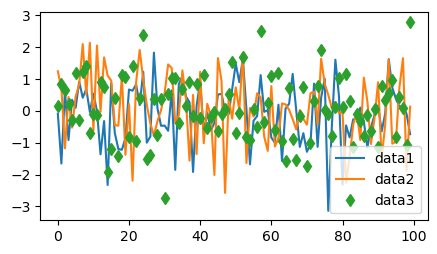

In [17]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

## Échelles et graduations des axes

Chaque Axe a deux (ou trois) objets `~.axis.Axis` représentant les axes x et
axe y. Ceux-ci contrôlent l'*échelle* de l'Axe, les *localisateurs* de graduation et
cochent les *formateurs*. Des axes supplémentaires peuvent être attachés pour afficher d'autres axes
objets.

### Échelles

En plus de l'échelle linéaire, Matplotlib fournit des échelles non linéaires,
comme une échelle logarithmique.


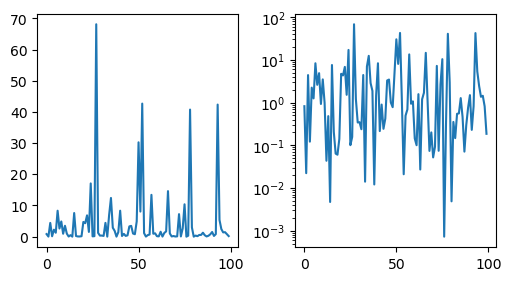

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data);

### Localisateurs et formateurs de tiques

Chaque axe dispose d'un *localisateur* et d'un *formateur* de tic-tac qui choisissent où placer les marqueurs le long des axes.  Une interface simple pour cela est
`~.Axes.set_xticks` :

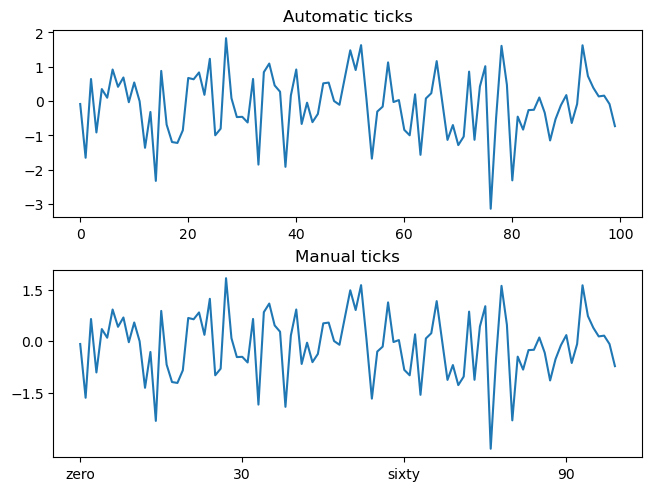

In [24]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30),['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  

# notez que nous n'avons pas besoin de spécifier les étiquettes
axs[1].set_title('Manual ticks');

### Tracer les dates et les chaînes

Matplotlib peut gérer le traçage de tableaux de dates et de tableaux de chaînes, ainsi que de nombres à virgule flottante. Ceux-ci obtiennent des localisateurs et des formateurs spéciaux, le cas échéant.



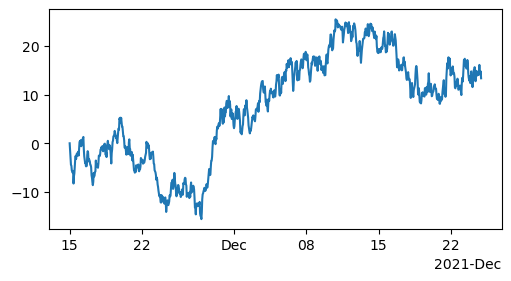

In [20]:
#Tracer des dates
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h')) # affichage par heure

data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);

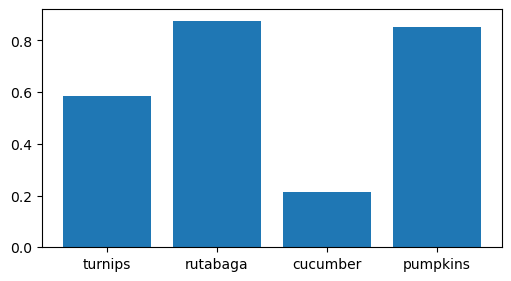

In [21]:
#Tracer des strings
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)));

### Objets Axe supplémentaires

Le traçage de données de magnitude différente dans un seul graphique peut nécessiter
un axe y supplémentaire. Un tel axe peut être créé en utilisant
`~.Axes.twinx` pour ajouter un nouvel Axes avec un axe x invisible et un axe y
positionné à droite (analogiquement pour `~.Axes.twiny`).

Text(0.5, 0, 'Angle [°]')

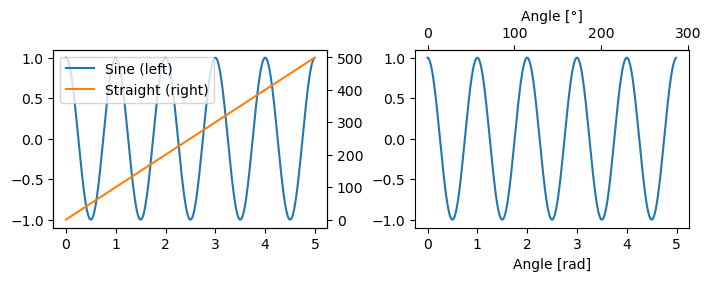

In [139]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

## Données mappées en couleur

Souvent, nous voulons avoir une troisième dimension dans un tracé représenté par une couleur dans
une palette de couleurs. Matplotlib a un certain nombre de types de tracés qui font cela :


Text(0.5, 1.0, 'scatter()')

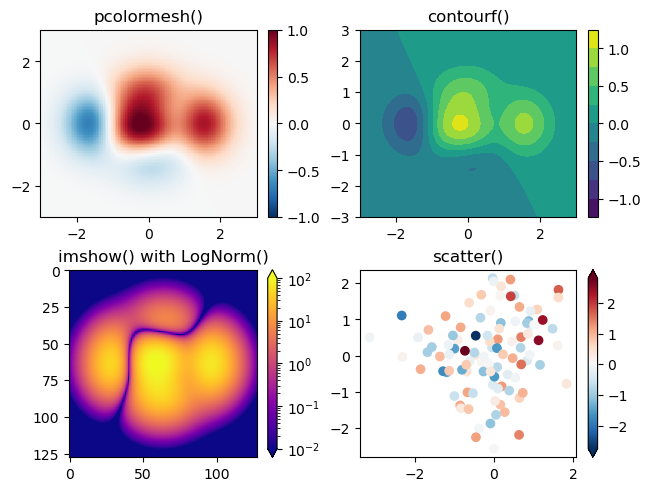

In [138]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)
# meshgrid : Renvoie des matrices de coordonnées à partir
# de vecteurs de coordonnées.

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

## Travailler avec plusieurs figures et axes

Plusieurs axes peuvent être ajoutés de plusieurs façons, mais la plus basique est
``plt.subplots()`` comme utilisé ci-dessus. On peut réaliser des mises en page plus complexes,
avec des objets Axes couvrant des colonnes ou des lignes, en utilisant `~.pyplot.subplot_mosaic`.

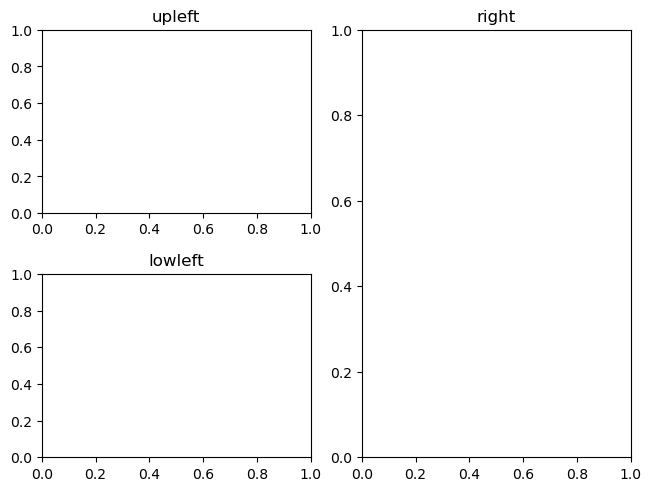

In [140]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right');

## Créez un graphique à tiges `stem`

Un graphique à tiges dessine des lignes perpendiculaires à une ligne de base à chaque emplacement, de la ligne de base aux têtes, et y place un marqueur. Pour les diagrammes de tiges verticales (valeur par défaut), les locs sont des positions x et les têtes sont des valeurs y. Pour les diagrammes de tiges horizontales, les locs sont des positions y et les têtes sont des valeurs x.

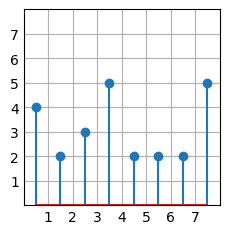

In [40]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

# make data
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.randint(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.stem(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
plt.show()

### Tige 3D
Démonstration d'un graphique à tiges en 3D, qui trace des lignes verticales d'une ligne de base à la coordonnée z et place un marqueur à la pointe.

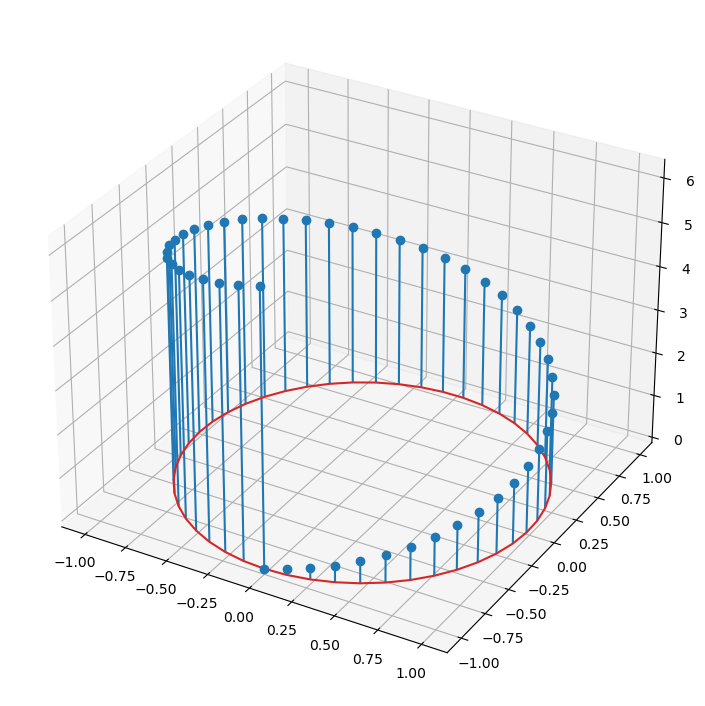

In [218]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0, 2*np.pi)
x = np.cos(theta - np.pi/2)
y = np.sin(theta - np.pi/2)
z = theta

fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))
ax.stem(x, y, z)

plt.show()